# LSTM ile Hisse Senedi Fiyatı Tahmini

* İş Problemi (Business Problem)
* Veriyi Anlamak (Data Understanding)
* Veriyi Hazırlamak (Data Preparation)
* Modelleme (Modeling)
* DeğerIendirme (Evaluation)

<h4> 1.) İş Problemi</h4>


- **Date:** İlgili İşlem Gününün tarihini temsil etmektedir.
- **Open:** İlgili işlem gününe ait Hisse başlangıç fiyatını temsil etmektedir.
- **High:** İlgili işlem gününe ait en yüksek fiyatı temsil etmektedir.
- **Low:** İlgili işlem gününe ait en düşük fiyatı temsil etmektedir.
- **Close:** İlgili işlem gününde hisse senedinin kapanış fiyatını temsil etmektedir.
- **Adj Close:** İlgili işlem gününe ait hisse senedinin düzeltilmiş kapanış fiyatını temsil etmektedir.
- **Volume:** İlgili işlem gününe ait işlem hacmi bilgisini temsil etmektedir.

In [1]:
# Veriyi okuma ve işleme adımında kullanılacak olan kütüphaneler
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Model değerlendirme ve veriyi scale edebilmemiz için kullanılacak olan kütüphaneler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Model için kullanılacak olan kütüphaneler
from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Dense, LSTM, Dropout
from tensorflow.keras. callbacks import ModelCheckpoint, EarlyStopping

# Warningleri kapatmak için kullanılmaktadır.
import warnings
warnings. filterwarnings('ignore')

# Tensorflow Warning Engelleme
import os
os. environ ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1. logging.set_verbosity(tf.compat.v1.logging. ERROR)

In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/YAZ KAMPI/8 - Derin Öğrenme/TSLA.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [5]:
check_df(df)

##################### Shape #####################
(2416, 7)
##################### Types #####################
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
##################### Head #####################
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
##################### Tail #####################
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [7]:
df.shape

(2416, 7)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.3 KB


In [10]:
tesla_df = df[['Date','Close']]

In [11]:
tesla_df.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [12]:
print(tesla_df['Date'].min())
print(tesla_df['Date'].max())

2010-06-29 00:00:00
2020-02-03 00:00:00


In [13]:
tesla_df.index = tesla_df['Date']

In [14]:
tesla_df.drop('Date', axis = 1, inplace = True)

In [15]:
tesla_df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [16]:
result_df = tesla_df.copy()

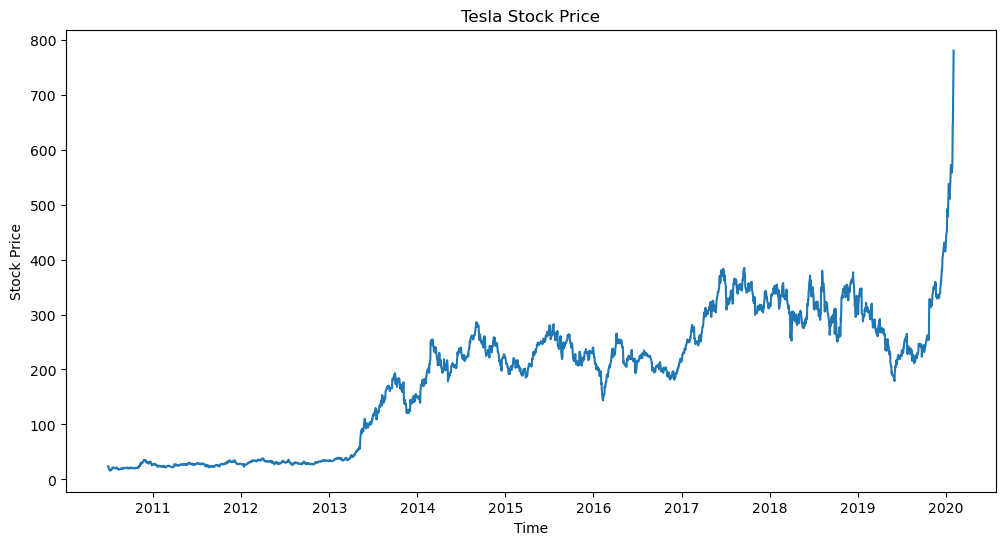

In [17]:
plt.figure(figsize = (12,6))
plt.plot(tesla_df['Close'])
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title('Tesla Stock Price')
plt.show();

In [18]:
tesla_df = tesla_df.values
type(tesla_df)

numpy.ndarray

### Kodun İşlevi

```python
tesla_df = tesla_df.values
type(tesla_df)
```

1. **`tesla_df.values`**:
   - Bu ifade, `tesla_df` veri çerçevesinin (`DataFrame`) numpy dizisine (`ndarray`) dönüştürülmesini sağlar. `values` özelliği, pandas veri çerçevesindeki verileri bir numpy dizisi olarak alır.

2. **`type(tesla_df)`**:
   - Bu ifade, `tesla_df` değişkeninin veri tipini kontrol eder. `tesla_df.values` ifadesinden sonra `tesla_df`, numpy dizisi (numpy array) olacaktır.

### Neden Yapıyoruz?

1. **Veri Analizi ve İşleme**:
   - Bazı makine öğrenimi ve veri işleme kütüphaneleri, pandas veri çerçevelerini doğrudan işlemek yerine numpy dizilerini kullanır. Bu nedenle, veriyi numpy dizisine dönüştürmek, bu tür işlemler için uyumlu hale getirir.

2. **Hız ve Verimlilik**:
   - NumPy dizileri genellikle daha hızlı ve daha verimlidir çünkü doğrudan bellek üzerinde çalışır ve genellikle daha az bellek tüketir. Özellikle büyük veri setleri ile çalışırken, performans iyileştirmeleri sağlar.

3. **Model Girdileri**:
   - Makine öğrenimi modelleri genellikle numpy dizileriyle çalışır. Veri çerçevelerini numpy dizilerine dönüştürmek, verileri modelin gerektirdiği biçimde sunar.

Bu dönüşüm, verilerin çeşitli makine öğrenimi ve veri işleme aşamalarında uyumlu ve etkili bir şekilde kullanılmasını sağlar.

In [19]:
tesla_df = tesla_df.astype('float32')
def split_data(dataframe, test_size):
    position = int(round(len(dataframe) * (1-test_size)))
    train = dataframe[:position]
    test = dataframe[position:]
    return train, test, position

1. **Veri Tipi Dönüşümü (`astype('float32')`):** 
   - `tesla_df = tesla_df.astype('float32')`: Veri çerçevesindeki tüm sayısal veriler `float32` veri tipine dönüştürülüyor. Bu, özellikle büyük veri kümelerinde belleği verimli kullanmak ve bazı makine öğrenimi modelleriyle uyumlu çalışmak için yapılır.

2. **Veriyi Eğitim ve Test Setlerine Ayırma:**
   - `split_data` fonksiyonu, verilen `dataframe`'i bir `test_size` oranına göre iki parçaya böler: 
     - **Eğitim Seti (`train`)**: Modelin öğrenmesi için kullanılan veri seti.
     - **Test Seti (`test`)**: Modelin doğruluğunu ve genel performansını değerlendirmek için kullanılan veri seti.
   - `position = int(round(len(dataframe) * (1-test_size)))`: Bu satır, veri setini hangi noktada böleceğinizi belirler. Örneğin, `test_size` 0.2 ise, verinin %80'i eğitim setine, %20'si ise test setine ayrılır.
   - `train = dataframe[:position]`: `position`'a kadar olan veriler eğitim seti olarak alınır.
   - `test = dataframe[position:]`: `position`'dan sonraki veriler test seti olarak alınır.

**Neden Yapıyoruz?**

- **Eğitim ve Test Setlerine Ayırma:** Modelin performansını değerlendirebilmek için veriyi eğitim ve test setlerine ayırmak gerekir. Eğitim setiyle model eğitilir, test setiyle de modelin gerçek dünyadaki veriler üzerindeki başarımı ölçülür.
- **Veri Tipi Dönüşümü:** `float32` veri tipine dönüşüm, verilerin hassasiyetini koruyarak hesaplamaların daha hızlı ve hafif yapılmasını sağlar.

Bu adımlar, makine öğrenimi modellerinin geliştirilmesi ve test edilmesi sürecinde yaygın olarak kullanılır.

**train_test_split veriyi rastgele böler. Bizim projemiz zaman serisi projesi olduğu için rastgele bölünmemesi gerekiyor.**

**Çünkü bir değer kendinden önce değerlere bağlı.**

In [20]:
train, test, pos = split_data(tesla_df, 0.2)

In [21]:
print(train.shape, test.shape)

(1933, 1) (483, 1)


In [22]:
scaler_train = MinMaxScaler(feature_range= (0,1))
train = scaler_train.fit_transform(train)

In [23]:
scaler_test = MinMaxScaler(feature_range= (0,1))
test = scaler_test.fit_transform(test)

**Ölçeğin 0 - 1 arasında olması performansı pozitif etkiler**

In [24]:
train[:5], test[:5]

(array([[0.02191224],
        [0.02174973],
        [0.01668472],
        [0.0092091 ],
        [0.00083966]], dtype=float32),
 array([[0.25685903],
        [0.24829045],
        [0.25511202],
        [0.24978784],
        [0.2465767 ]], dtype=float32))

In [25]:
lookback = 20

In [26]:
def create_features(data, lookback):
    X, Y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        Y.append(data[i,0])

    return np.array(X), np.array(Y)

### Kodun Açıklaması

```python
def create_features(data, lookback):
    X, Y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        Y.append(data[i,0])

    return np.array(X), np.array(Y)
```

1. **Fonksiyon Tanımı**:
   - `create_features(data, lookback)` fonksiyonu, zaman serisi verilerini özellikler (X) ve hedefler (Y) olarak ikiye ayırarak makine öğrenimi modellerinde kullanılacak veriler oluşturur. `data` zaman serisi verilerini içerir ve `lookback` ise geçmiş verilerin kaç adım geriden geleceğe tahmin yapmak için kullanılacağını belirler.

2. **Boş Listeler Oluşturma**:
   - `X, Y = [], []`: `X` ve `Y` listeleri boş olarak başlatılır. `X` listesi özellikleri (input) tutarken, `Y` listesi hedefleri (output) tutar.

3. **For Döngüsü ile Özellik ve Hedef Oluşturma**:
   - `for i in range(lookback, len(data)):`: Bu döngü, `lookback` adımından başlayarak veri uzunluğunun sonuna kadar iterasyon yapar. `lookback` adımı, modelin geçmiş verileri kaç adım geri alarak tahmin yapacağını belirler.
   - `X.append(data[i-lookback:i, 0])`: Bu satır, mevcut `i` konumuna göre `lookback` adım geriden verileri alır ve `X` listesine ekler. `data[i-lookback:i, 0]`, `i-lookback` ile `i` arasındaki verileri seçer.
   - `Y.append(data[i, 0])`: Bu satır, mevcut `i` konumundaki veriyi `Y` listesine ekler. Bu değer, `X`'deki geçmiş verilerin tahmin edilmesi gereken hedef değerdir.

4. **NumPy Dizilerine Dönüştürme**:
   - `return np.array(X), np.array(Y)`: `X` ve `Y` listeleri NumPy dizilerine dönüştürülür ve geri döndürülür. NumPy dizileri, makine öğrenimi algoritmalarının ve çeşitli veri işleme işlemlerinin daha verimli bir şekilde çalışmasını sağlar.

### Özet
Bu fonksiyon, zaman serisi verilerini belirli bir geçmiş uzunluğu (`lookback`) kullanarak özellikler (`X`) ve hedefler (`Y`) oluşturur. Özellikle LSTM ve diğer RNN türleri için geçmiş verilerden tahmin yapmak üzere kullanılan veri setlerinin hazırlanmasına yardımcı olur.

In [27]:
# Train veri seti
X_train, y_train = create_features(train, lookback)

In [28]:
# Test veri seti
X_test, y_test = create_features(test, lookback)

In [29]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 20) (1913,) (463, 20) (463,)


In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [31]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [32]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 1, 20) (1913, 1) (463, 1, 20) (463, 1)


In [33]:
model = Sequential()

model.add(LSTM(units = 50,
               activation = 'relu',
               input_shape = (X_train.shape[1],lookback)))

model.add(Dropout(0.2))

model.add(Dense(1))

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          14,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Optimizasyon ve Değerlendirme Metrikleri Ayarlanması
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [56]:
callbacks = [EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode="min")]

### `EarlyStopping` Callback
`EarlyStopping`, modelin eğitim sürecinde, belirli bir kriteri izleyerek modelin aşırı uyumunu (overfitting) önlemeye yardımcı olan bir geri çağırma (callback) fonksiyonudur. Eğitim sürecini belirli bir koşul sağlanana kadar devam ettirir ve koşul sağlanmadığında eğitimi durdurur.

### Parametreler:
- **`monitor='val_loss'`**: Bu parametre, erken durdurma için hangi metriklerin izleneceğini belirtir. Bu örnekte, modelin doğrulama (validation) kaybı (`val_loss`) izlenir. Eğitim sırasında modelin doğrulama setindeki performansı takip edilir ve bu metrikte bir iyileşme gözlemlenmezse eğitim durdurulur.

- **`patience=3`**: Bu parametre, belirli bir sayıda epoch (dönem) boyunca izlenen metrikte herhangi bir iyileşme gözlemlenmediğinde eğitim sürecini durdurur. Burada, `patience=3` ayarı, doğrulama kaybında iyileşme gözlemlenmediğinde 3 epoch boyunca eğitimin devam edeceğini belirtir. Yani, doğrulama kaybı 3 ardışık epoch boyunca azalmıyorsa, eğitim durdurulacaktır.

- **`verbose=1`**: Bu parametre, eğitim sırasında erken durdurmanın ne kadar ayrıntılı olarak rapor edileceğini kontrol eder. `verbose=1` ayarı, erken durdurma olayları hakkında bilgi verir (örneğin, erken durdurma koşulunun ne zaman sağlandığına dair mesajlar).

- **`mode="min"`**: Bu parametre, izlenen metrik için hangi yönde iyileşme beklenip beklenmediğini belirtir. `mode="min"` ayarı, izlenen metrik (bu durumda `val_loss`) minimuma inmeye çalışıldığı anlamına gelir. Yani, doğrulama kaybı azalmadığında eğitim durdurulacaktır.

### Özet:
Bu kod, modelin eğitim sürecini erken durdurmak için `EarlyStopping` callback'ini kullanır. `val_loss` metrik değerinin belirli bir süre boyunca iyileşmediği durumlarda, modelin eğitimini durdurur. Bu, modelin aşırı uyumunu önlemeye yardımcı olur ve eğitim süresini optimize eder.

In [37]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data=(X_test, y_test),
                    callbacks = callbacks,
                    shuffle=False)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 11: early stopping


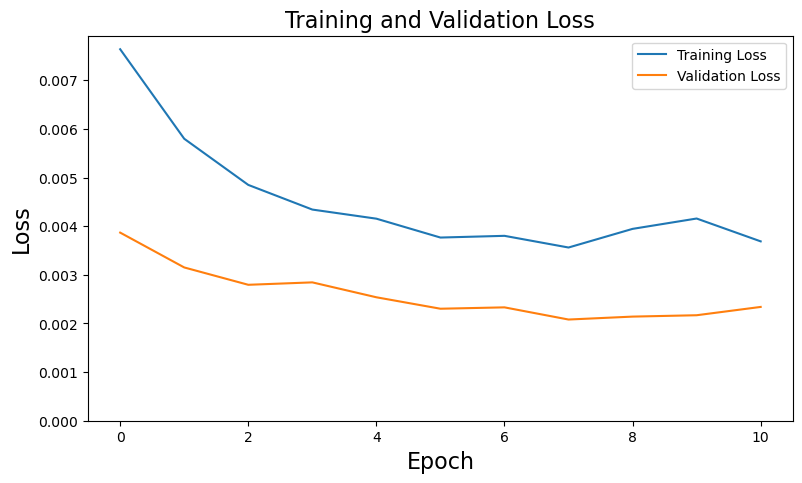

In [38]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize=16)
plt.show()

********

In [39]:
loss = model.evaluate(X_test, y_test, batch_size = 1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 0.0018


Kodunuzun amacı modelin test veri setindeki performansını değerlendirmektir. Kodun detaylarına bakalım:

```python
loss = model.evaluate(X_test, y_test, batch_size=1)
```

### Açıklama:

- **`model.evaluate()`**: Bu fonksiyon, modelin test veri setindeki performansını değerlendirir ve kayıp (loss) ile diğer belirtilmişse metrikleri hesaplar. Bu, modelin test veri setinde ne kadar iyi performans gösterdiğini anlamak için kullanılır.

- **`X_test`**: Test veri setindeki giriş verilerini temsil eder. Bu, modelin tahmin yapması için kullandığı veridir.

- **`y_test`**: Test veri setindeki gerçek etiketleri veya hedef değerleri temsil eder. Modelin tahminlerinin ne kadar doğru olduğunu ölçmek için karşılaştırılan gerçek sonuçlardır.

- **`batch_size=1`**: Bu parametre, test verilerini değerlendirirken modelin kaç örneği aynı anda işleyeceğini belirtir. Burada `batch_size=1` olarak ayarlanmış, bu da her seferinde bir örneğin işlendiği anlamına gelir. Bu, değerlendirme işleminin daha ayrıntılı yapılmasını sağlar ama genellikle performans açısından daha yavaş olabilir.

### Çıktı:

- **`loss`**: Bu değişken, `model.evaluate()` fonksiyonundan dönen değeri temsil eder. Genellikle, bu değer test kaybı (loss) olarak adlandırılır. Ayrıca, modelin değerlendirmesi sırasında belirtilmişse diğer metrikler de dönebilir. Kayıp değeri, modelin test verileri üzerindeki performansını gösterir; ne kadar düşükse, model o kadar iyi performans göstermiştir.

### Kullanım Amacı:

Bu kod, modelin test veri setinde ne kadar iyi performans gösterdiğini anlamak için kullanılır. Test kaybını ve/veya metrikleri elde ederek, modelin genel başarısını değerlendirebilir ve gerektiğinde iyileştirme yapabilirsiniz. Test kaybı, genellikle modelin ne kadar iyi genelleştirme yaptığını gösterir; yani, eğitim verisine fazla aşırı uyum sağlanıp sağlanmadığını anlamak için önemli bir ölçüttür.

In [40]:
print("\nTest Loss : %.1f%%" % (100.0 * loss))


Test Loss : 0.2%


In [41]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step


In [58]:
train_predict = scaler_train.inverse_transform(train_predict) 
test_predict = scaler_test.inverse_transform(test_predict) 

# bu değerler normalde 0 - 1 arasındaydı. Eski haline dönüştürmüş olduk.

In [43]:
y_train = scaler_train.inverse_transform(y_train) 
y_test = scaler_test.inverse_transform(y_test) 

In [44]:
# Train veri setine ait RMSE değeri
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))

In [45]:
# Test veri setine ait RMSE değeri
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

In [46]:
print(f"Eğitim RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Eğitim RMSE: 13.016621589660645
Test RMSE: 29.07655906677246


In [47]:
train_prediction_df = result_df[lookback:pos]

In [48]:
train_prediction_df.head()

,Close
Date,
2010-07-28,20.719999
2010-07-29,20.350000
2010-07-30,19.940001
2010-08-02,20.920000
2010-08-03,21.950001


In [49]:
train_prediction_df['Predicted'] = train_predict

In [50]:
train_prediction_df.head()

,Close,Predicted
Date,,
2010-07-28,20.719999,35.597889
2010-07-29,20.350000,35.589481
2010-07-30,19.940001,35.586563
2010-08-02,20.920000,35.581333
2010-08-03,21.950001,35.561375


In [51]:
test_prediction_df = result_df[pos+lookback:]

In [52]:
test_prediction_df['Predicted'] = test_predict

In [53]:
test_prediction_df.head()

,Close,Predicted
Date,,
2018-04-03,267.529999,314.626678
2018-04-04,286.940002,311.997162
2018-04-05,305.720001,309.491547
2018-04-06,299.299988,309.085449
2018-04-09,289.660004,311.655914


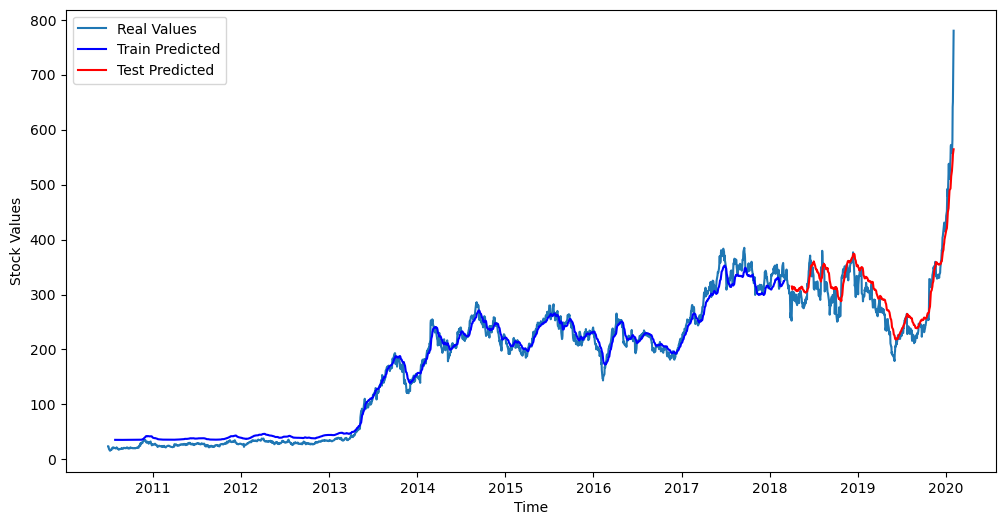

In [54]:
# Train ve Test Tahminlerini ayrı ayrı görselleştirme işlemi
plt.figure(figsize=(12,6))
plt.plot(result_df, label = 'Real Values')
plt.plot(train_prediction_df["Predicted"], color = 'blue', label = 'Train Predicted')
plt.plot(test_prediction_df["Predicted"], color = 'red', label = 'Test Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Values')
plt.legend()
plt.show()